In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("/uscms/home/kyungmip/nobackup/CMSSW_10_6_26/src/iDMe/python_analysis/analysisTools/")
import plotTools as ptools

## Import coffea files

In [2]:
prefix = './coffea/'
suffix = '_hist_cut8to11'

# Signal
f_sig = "signal_v2_2018_aEM"
sig_histo = util.load(f'{prefix}/{f_sig}{suffix}.coffea')[0]

# Background
bkg_files = {
    "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

bkg_histos = {}
histograms = []

for b in bkg_files.keys():
    bkg_histos[b] = util.load(f'{prefix}/{bkg_files[b]}{suffix}.coffea')[0]
    histograms = list(bkg_histos[b].keys())

In [3]:
# sig_histo is a dictionary of variables
print(sig_histo.keys())

dict_keys(['sel_vtx_type', 'sel_vtx_sign', 'sel_vtx_dR', 'sel_vtx_dR_over_pT', 'sel_vtx_dR_over_m', 'sel_vtx_dR_over_pTm', 'sel_vtx_dR_over_mpT', 'sel_vtx_chi2', 'sel_vtx_prob', 'sel_vtx_vxy', 'sel_vtx_vxy_zoom', 'sel_vtx_vxy_zoomzoom', 'sel_vtx_vxySignif', 'sel_vtx_mass', 'sel_vtx_minDxy', 'sel_vtx_minDxy_fine', 'sel_vtx_pt', 'sel_vtx_eta', 'sel_vtx_phi', 'sel_vtx_matchType', 'sel_vtx_max_chi2', 'sel_vtx_min_pt', 'sel_vtx_maxPFIso', 'sel_vtx_minEledRj', 'sel_vtx_minEledPhiJ', 'sel_vtx_METdPhi_vs_matchType', 'sel_vtx_minEledRj_vs_matchType', 'sel_vtx_minEledPhiJ_vs_matchType', 'sel_vtx_mindRj', 'sel_vtx_mindPhiJ', 'sel_vtx_mindRj_vs_matchType', 'sel_vtx_mindPhiJ_vs_matchType', 'sel_vtx_mass_vs_mindxy', 'sel_vtx_mass_vs_vxy', 'sel_vtx_METdPhi_vs_chi2', 'sel_vtx_METdPhi_vs_mindxy', 'sel_vtx_METdPhi_vs_vxy', 'sel_vtx_METdPhi_vs_mindPhiJ', 'sel_vtx_METdPhi_vs_mindRj', 'sel_vtx_METdPhi_vs_minEledPhiJ', 'sel_vtx_METdPhi_vs_minEledRj', 'sel_vtx_maxPFIso_vs_mindxy', 'sel_vtx_mindRj_vs_mindxy',

In [4]:
# bkg_histos is a dictionary of dictionary
print(bkg_histos.keys())

dict_keys(['QCD', 'Top', 'DY', 'Diboson', 'Triboson', 'W+jets', 'Z+jets'])


In [5]:
process = 'W+jets'
print(bkg_histos[process].keys())

dict_keys(['sel_vtx_type', 'sel_vtx_sign', 'sel_vtx_dR', 'sel_vtx_dR_over_pT', 'sel_vtx_dR_over_m', 'sel_vtx_dR_over_pTm', 'sel_vtx_dR_over_mpT', 'sel_vtx_chi2', 'sel_vtx_prob', 'sel_vtx_vxy', 'sel_vtx_vxy_zoom', 'sel_vtx_vxy_zoomzoom', 'sel_vtx_vxySignif', 'sel_vtx_mass', 'sel_vtx_minDxy', 'sel_vtx_minDxy_fine', 'sel_vtx_pt', 'sel_vtx_eta', 'sel_vtx_phi', 'sel_vtx_matchType', 'sel_vtx_max_chi2', 'sel_vtx_min_pt', 'sel_vtx_maxPFIso', 'sel_vtx_minEledRj', 'sel_vtx_minEledPhiJ', 'sel_vtx_METdPhi_vs_matchType', 'sel_vtx_minEledRj_vs_matchType', 'sel_vtx_minEledPhiJ_vs_matchType', 'sel_vtx_mindRj', 'sel_vtx_mindPhiJ', 'sel_vtx_mindRj_vs_matchType', 'sel_vtx_mindPhiJ_vs_matchType', 'sel_vtx_mass_vs_mindxy', 'sel_vtx_mass_vs_vxy', 'sel_vtx_METdPhi_vs_chi2', 'sel_vtx_METdPhi_vs_mindxy', 'sel_vtx_METdPhi_vs_vxy', 'sel_vtx_METdPhi_vs_mindPhiJ', 'sel_vtx_METdPhi_vs_mindRj', 'sel_vtx_METdPhi_vs_minEledPhiJ', 'sel_vtx_METdPhi_vs_minEledRj', 'sel_vtx_maxPFIso_vs_mindxy', 'sel_vtx_mindRj_vs_mindxy',

## Access the cutflow information -- Signal

In [6]:
sig_samples = list(sig_histo['cutflow'].keys()) # names of signal sub-process, i.e. mass point, lifetime etc.
print(sig_samples)

['sig_2018_Mchi-55p0_dMchi-10p0_ctau-100', 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-10', 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-1', 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-100', 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-10', 'sig_2018_Mchi-44p0_dMchi-8p0_ctau-100', 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-1', 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-100', 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-10', 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-100', 'sig_2018_Mchi-33p0_dMchi-6p0_ctau-1', 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-1', 'sig_2018_Mchi-33p0_dMchi-6p0_ctau-10', 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-1', 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-100', 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-10', 'sig_2018_Mchi-21p0_dMchi-2p0_ctau-100', 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-10', 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-1', 'sig_2018_Mchi-11p0_dMchi-2p0_ctau-100', 'sig_2018_Mchi-10p5_dMchi-1p0_ctau-100', 'sig_2018_Mchi-21p0_dMchi-2p0_ctau-1', 'sig_2018_Mchi-11p0_dMchi-2p0_ctau-10', 'sig_2018_Mchi-10p5_dMchi-1p0_ctau-10', 'sig_2018_Mchi-11p0_dMchi-2p0_ctau

In [7]:
cuts = list(sig_histo['cutflow'][sig_samples[0]].keys())
print(cuts)

['all', 'initial', 'cut0', 'cut1', 'cut2', 'cut3', 'cut4', 'cut5', 'cut6', 'cut7', 'cut8', 'cut9', 'cut10', 'cut11']


**Based on the signal file name, i.e. sig_2018_Mchi-55p0_dMchi-10p0_ctau-100, extract the mass point, lifetime, etc and make it into a pandas dataframe.**

Use `signalPoint` defined in `/python_analysis/analysisTools/plotTools.py`

In [8]:
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

print(si)

                                        mchi  dmchi   ctau    m1    m2  delta  \
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100  55.0   10.0  100.0  50.0  60.0    0.2   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10   55.0   10.0   10.0  50.0  60.0    0.2   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1    55.0   10.0    1.0  50.0  60.0    0.2   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100   52.5    5.0  100.0  50.0  55.0    0.1   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10    52.5    5.0   10.0  50.0  55.0    0.1   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100   44.0    8.0  100.0  40.0  48.0    0.2   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1     52.5    5.0    1.0  50.0  55.0    0.1   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100   42.0    4.0  100.0  40.0  44.0    0.1   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10    42.0    4.0   10.0  40.0  44.0    0.1   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100   31.5    3.0  100.0  30.0  33.0    0.1   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1     33.0    6.0    1.0  30.0  36.0    0.2   
sig_2018_Mchi-42p0_dMchi-4p0

**There are four cutflow-related variables in the coffea output.**

* `cutDesc`: cut names
* `cutflow`: efficiency = selected events / total events `cutflow[cutName] += np.sum(events.genWgt)/sum_wgt`
* `cutflow_cts`: reweighted by xsec `cutflow_counts[cutName] = xsec*lumi*cutflow[cutName]` 
* `cutflow_nevts`: raw counts `cutflow_nevts[cutName] += len(events)` -- will not be used.

In [9]:
# cutDesc
print(sig_histo['cutDesc'])

print(f"\nex) cut8 corresponds to {sig_histo['cutDesc']['cut8']}")

defaultdict(<class 'str'>, {'all': 'No CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo Cuts', 'initial': 'PreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPrese

**Access the cut names stored in `cutDesc` via `getCut` defined in `/python_analysis/analysisTools/plotTools.py`.** The function removes the redundant junk in `all` and `initial` steps.

In [10]:
sig_histo['cutDesc'].keys()

dict_keys(['all', 'initial', 'cut0', 'cut1', 'cut2', 'cut3', 'cut4', 'cut5', 'cut6', 'cut7', 'cut8', 'cut9', 'cut10', 'cut11'])

In [11]:
# cutflow
cutNames = {cname:ptools.getCut(sig_histo['cutDesc'][cname]) for cname in sig_histo['cutDesc'].keys()}
print(cutNames)

{'all': 'No Cuts', 'initial': 'Preselection', 'cut0': 'Leading jet |eta| < 2.4', 'cut1': 'Leading jet pT > 80 GeV', 'cut2': 'dPhi(MET,leading jet) > 1.5', 'cut3': 'dPhi(MET,all jets) > 0.75', 'cut4': 'OSSF', 'cut5': 'Vertex chi2/df < 5', 'cut6': 'dPhi(MET,vtx) < 2.5', 'cut7': 'Vertex chi2/df < 3', 'cut8': 'dPhi(MET,vtx) < 1.0', 'cut9': 'm(ee) < 20 GeV', 'cut10': 'dR(ee) < 1.0', 'cut11': 'min(dxy) > 0.01'}


In [12]:
# signal efficiencies by delta/ctau
cf_s = sig_histo['cutflow']
ct_s = sig_histo['cutflow_cts']
desc = sig_histo['cutDesc']

In [13]:
process = 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-100'

print(process)

print(f'\nEfficiency = selected events / total events analyzed from ntuples: {cf_s[process]}')
print(f'\nEvents (xsec weighted): {ct_s[process]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency = selected events / total events analyzed from ntuples: defaultdict(<class 'float'>, {'all': 0.022439342491859922, 'initial': 0.003936879082005989, 'cut0': 0.0037732218980072044, 'cut1': 0.0037700166523811527, 'cut2': 0.0037668156030720556, 'cut3': 0.003506894249911221, 'cut4': 0.002066556013836811, 'cut5': 0.000908132048647387, 'cut6': 0.0008600213364845719, 'cut7': 0.0007766159269644009, 'cut8': 0.0006482350917213912, 'cut9': 0.0006418169380768116, 'cut10': 0.00045897714478702927, 'cut11': 0.0004236409162339411})

Events (xsec weighted): defaultdict(<class 'float'>, {'all': 1.3674894236086068, 'initial': 0.23991970837033733, 'cut0': 0.2299461778046761, 'cut1': 0.22975084500937326, 'cut2': 0.22955576794433766, 'cut3': 0.21371574493357354, 'cut4': 0.12593922897882398, 'cut5': 0.05534301961903809, 'cut6': 0.052411075865837924, 'cut7': 0.047328216801141465, 'cut8': 0.03950448335384725, 'cut9': 0.03911335080478787, 'cut10': 0.027970801345

In [14]:
cut = 'all'

print(process)
print(f'\nEfficiency after {cutNames[cut]}: {cf_s[process][cut]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency after No Cuts: 0.022439342491859922


**Note that the efficiency at 'No Cuts' step is not 1. This is because the efficiency at this step is the efficiency of the base selections (MET trigger, MET cut etc) applied to the ntuples by the skimmer before we ran the coffea analyzer. In other words, this is 'no cut' from the point of `coffea` analyzer, but base cuts already have been applied by the skimmer.**

In [15]:
cut = 'initial'

print(process)
print(f'\nEfficiency after {cutNames[cut]}: {cf_s[process][cut]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency after Preselection: 0.003936879082005989


**The efficiency at 'Preselection' step corresponds to the efficiency after requiring that there is at least one good vertex of the lepton jets. This preselection is defined in `L132-135` in `/python_analysis/analysisTools/skimmerTools.py`**

`selectExistingGoodVtx` in `/python_analysis/analysisTools/analysisSubroutines.py` saves `good_vtx` of di-electrons that pass the selections, out of all `vtx`. Then, the code requires that there's at least one `good_vtx` in the event (this is the **preselection**). From the `good_vtx`, pick the "best" one based on their chi2/ndf. `vtx` is saved from the ntuplizer in `/iDMeSkimmer/plugins/iDMeSkimmer.cc` 

In [16]:
cut = 'cut0'

print(process)
print(f'\nEfficiency after {cutNames[cut]}: {cf_s[process][cut]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency after Leading jet |eta| < 2.4: 0.0037732218980072044


### Access the cutflow of the signal based on mass point, lifetime, etc

In [17]:
deltas = sorted(list(set(si.delta)))

print(f'deltas: {deltas}')

deltas: [0.1, 0.2]


In [18]:
delta = deltas[0]

m1s = sorted(list(set(si[si.delta==delta].m1)))
ctaus = sorted(list(set(si[si.delta==delta].ctau)))

print(f'For delta = {delta}: m1 = {m1s}, ctaus = {ctaus}')

For delta = 0.1: m1 = [10.0, 20.0, 30.0, 40.0, 50.0], ctaus = [1.0, 10.0, 100.0]


In [19]:
delta = deltas[0]
m1 = m1s[0]
ct = ctaus[0]

pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
print(f'Signal sample with delta = {delta}, m1 = {m1}, ct = {ct}: {pt}\n')

effs = [cf_s[pt][cut] for cut in cuts]
print(f'Efficiency after each cut: {effs}')

Signal sample with delta = 0.1, m1 = 10.0, ct = 1.0: sig_2018_Mchi-10p5_dMchi-1p0_ctau-1

Efficiency after each cut: [0.016410498109340955, 0.003548886424581602, 0.003236635650939087, 0.003236635650939087, 0.003236635650939087, 0.0031732891034976897, 0.0020310453218055947, 0.0010471051912829819, 0.0010418046894589655, 0.0009942192452726077, 0.0009519349997706445, 0.0009413552655132765, 0.0008409024784588072, 0.000459982946835193]


## Display the efficiency as pandas dataframe

In [20]:
columns = list(cf_s.keys())
columns

['sig_2018_Mchi-55p0_dMchi-10p0_ctau-100',
 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-10',
 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-1',
 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-100',
 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-10',
 'sig_2018_Mchi-44p0_dMchi-8p0_ctau-100',
 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-1',
 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-100',
 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-10',
 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-100',
 'sig_2018_Mchi-33p0_dMchi-6p0_ctau-1',
 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-1',
 'sig_2018_Mchi-33p0_dMchi-6p0_ctau-10',
 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-1',
 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-100',
 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-10',
 'sig_2018_Mchi-21p0_dMchi-2p0_ctau-100',
 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-10',
 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-1',
 'sig_2018_Mchi-11p0_dMchi-2p0_ctau-100',
 'sig_2018_Mchi-10p5_dMchi-1p0_ctau-100',
 'sig_2018_Mchi-21p0_dMchi-2p0_ctau-1',
 'sig_2018_Mchi-11p0_dMchi-2p0_ctau-10',
 'sig_2018_Mchi-10p5_dMchi-1p0_ctau-10',
 'sig_2018_

In [21]:
efficiency = {c: [ cf_s[samp][c] for samp in columns ] for c in cuts}

efficiency['all']

[0.022439342491859922,
 0.03112463103097606,
 0.03382568049132571,
 0.02248783832772603,
 0.032302303564755226,
 0.01775914128938934,
 0.03627952660823992,
 0.01743353544833836,
 0.025433298915125066,
 0.013494327471434184,
 0.020121081940886035,
 0.02932291593738672,
 0.01965726254655494,
 0.017076425623838834,
 0.01037430176057215,
 0.02004946229340967,
 0.010686411064682556,
 0.01570980763222335,
 0.023166914597704105,
 0.007817563025904044,
 0.007993912114981266,
 0.01866072885359875,
 0.012367865381780604,
 0.012222185193762131,
 0.014369239132982211,
 0.016410498109340955,
 0.016532767426995935]

In [22]:
eff_df = pd.DataFrame.from_dict(efficiency).transpose()
eff_df.columns = columns

labels = [cutNames[c] for c in cuts]
# Replace "No Cuts" with "Preselections" and "Preselection" with "n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Preselection', 'n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No Cuts', 'Preselections'), cut))

eff_df.index = cut

In [23]:
eff_df

,sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,sig_2018_Mchi-44p0_dMchi-8p0_ctau-100,sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,...,sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,sig_2018_Mchi-31p5_dMchi-3p0_ctau-1,sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,sig_2018_Mchi-21p0_dMchi-2p0_ctau-10
Preselections,0.022439,0.031125,0.033826,0.022488,0.032302,0.017759,0.036280,0.017434,0.025433,0.013494,...,0.015710,0.023167,0.007818,0.007994,0.018661,0.012368,0.012222,0.014369,0.016410,0.016533
n(good vertex) > 0,0.003937,0.007399,0.009426,0.003785,0.006685,0.002969,0.009069,0.002765,0.005107,0.002076,...,0.003009,0.005055,0.001022,0.001134,0.003894,0.002165,0.002185,0.003113,0.003549,0.003026
Leading jet |eta| < 2.4,0.003773,0.006951,0.008983,0.003632,0.006265,0.002807,0.008595,0.002638,0.004902,0.001951,...,0.002827,0.004816,0.000942,0.001043,0.003716,0.002007,0.002033,0.002910,0.003237,0.002869
Leading jet pT > 80 GeV,0.003770,0.006951,0.008983,0.003632,0.006265,0.002807,0.008583,0.002638,0.004902,0.001951,...,0.002827,0.004816,0.000939,0.001043,0.003716,0.002007,0.002033,0.002910,0.003237,0.002865
"dPhi(MET,leading jet) > 1.5",0.003767,0.006951,0.008983,0.003632,0.006265,0.002807,0.008583,0.002638,0.004902,0.001951,...,0.002827,0.004816,0.000939,0.001043,0.003716,0.002007,0.002033,0.002910,0.003237,0.002865
"dPhi(MET,all jets) > 0.75",0.003507,0.006675,0.008672,0.003456,0.006105,0.002571,0.008508,0.002522,0.004792,0.001877,...,0.002711,0.004763,0.000875,0.001007,0.003677,0.001872,0.001983,0.002849,0.003173,0.002808
OSSF,0.002067,0.004605,0.006361,0.002004,0.004001,0.001533,0.005905,0.001411,0.003073,0.001015,...,0.001689,0.003081,0.000458,0.000547,0.002461,0.001194,0.001230,0.001931,0.002031,0.001733
Vertex chi2/df < 5,0.000908,0.002906,0.004360,0.000735,0.002262,0.000640,0.003587,0.000576,0.001609,0.000394,...,0.000951,0.001833,0.000200,0.000199,0.001432,0.000633,0.000607,0.001182,0.001047,0.000869
"dPhi(MET,vtx) < 2.5",0.000860,0.002889,0.004316,0.000693,0.002204,0.000616,0.003500,0.000535,0.001574,0.000365,...,0.000938,0.001797,0.000175,0.000176,0.001401,0.000603,0.000591,0.001148,0.001042,0.000850
Vertex chi2/df < 3,0.000777,0.002734,0.004005,0.000623,0.002016,0.000579,0.003239,0.000482,0.001520,0.000318,...,0.000853,0.001620,0.000161,0.000161,0.001316,0.000531,0.000534,0.001040,0.000994,0.000788


In [24]:
delta = deltas[0]
m1 = m1s[0]
ct = ctaus[0]

pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]

eff_df[pt]

Preselections                  0.016410
n(good vertex) > 0             0.003549
Leading jet |eta| < 2.4        0.003237
Leading jet pT > 80 GeV        0.003237
dPhi(MET,leading jet) > 1.5    0.003237
dPhi(MET,all jets) > 0.75      0.003173
OSSF                           0.002031
Vertex chi2/df < 5             0.001047
dPhi(MET,vtx) < 2.5            0.001042
Vertex chi2/df < 3             0.000994
dPhi(MET,vtx) < 1.0            0.000952
m(ee) < 20 GeV                 0.000941
dR(ee) < 1.0                   0.000841
min(dxy) > 0.01                0.000460
Name: sig_2018_Mchi-10p5_dMchi-1p0_ctau-1, dtype: float64

In [25]:
columns_ctau = {'1': {'0p1': [], '0p2': []}, '10': {'0p1': [], '0p2': []}, '100': {'0p1': [], '0p2': []}}

for name in columns:
    mchi = int(name.split('-')[1].split('p')[0])
    dmchi = int(name.split('-')[2].split('p')[0])

    delta = round(dmchi / mchi, 1)

    if 'ctau-10' not in name:
        if delta == 0.1:
            columns_ctau['1']['0p1'].append(name)
        elif delta == 0.2:
            columns_ctau['1']['0p2'].append(name)
    elif 'ctau-100' not in name:
        if delta == 0.1:
            columns_ctau['10']['0p1'].append(name)
        elif delta == 0.2:
            columns_ctau['10']['0p2'].append(name)
    else:
        if delta == 0.1:
            columns_ctau['100']['0p1'].append(name)
        elif delta == 0.2:
            columns_ctau['100']['0p2'].append(name)

print(columns_ctau)

{'1': {'0p1': ['sig_2018_Mchi-52p5_dMchi-5p0_ctau-1', 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-1', 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-1', 'sig_2018_Mchi-21p0_dMchi-2p0_ctau-1', 'sig_2018_Mchi-10p5_dMchi-1p0_ctau-1'], '0p2': ['sig_2018_Mchi-55p0_dMchi-10p0_ctau-1', 'sig_2018_Mchi-33p0_dMchi-6p0_ctau-1', 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-1', 'sig_2018_Mchi-11p0_dMchi-2p0_ctau-1']}, '10': {'0p1': ['sig_2018_Mchi-52p5_dMchi-5p0_ctau-10', 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-10', 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-10', 'sig_2018_Mchi-10p5_dMchi-1p0_ctau-10', 'sig_2018_Mchi-21p0_dMchi-2p0_ctau-10'], '0p2': ['sig_2018_Mchi-55p0_dMchi-10p0_ctau-10', 'sig_2018_Mchi-33p0_dMchi-6p0_ctau-10', 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-10', 'sig_2018_Mchi-11p0_dMchi-2p0_ctau-10']}, '100': {'0p1': ['sig_2018_Mchi-52p5_dMchi-5p0_ctau-100', 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-100', 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-100', 'sig_2018_Mchi-21p0_dMchi-2p0_ctau-100', 'sig_2018_Mchi-10p5_dMchi-1p0_ctau-100'], '0p2': ['sig_

In [35]:
counts = {}

for ct in columns_ctau.keys():
    counts[ct] = {}
    for delta in ['0p1', '0p2']:
        counts[ct][delta] = {}
        for samp in columns_ctau[ct][delta]:
            counts[ct][delta][samp] = {}
            for c in cuts:
                counts[ct][delta][samp][c] = ct_s[samp][c]

ct = '10'
delta = '0p1'
cut = 'all'
counts[ct][delta]['sig_2018_Mchi-52p5_dMchi-5p0_ctau-10'][cut]

623.1901236135519

In [36]:
columns_ctau[ct][delta]

['sig_2018_Mchi-52p5_dMchi-5p0_ctau-10',
 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-10',
 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-10',
 'sig_2018_Mchi-10p5_dMchi-1p0_ctau-10',
 'sig_2018_Mchi-21p0_dMchi-2p0_ctau-10']

In [38]:
#cts_df = {ct: pd.DataFrame.from_dict(counts[ct]).transpose() for ct in columns_ctau.keys()}

cts_df = {}

for ct in columns_ctau.keys():
    cts_df[ct] = {delta: pd.DataFrame.from_dict(counts[ct][delta]) for delta in ['0p1', '0p2']}
    #cts_df[ct] = {delta: pd.DataFrame.from_dict(counts[ct]).transpose()}
    
    for delta in ['0p1', '0p2']:
        cts_df[ct][delta].columns = [ s.replace('sig_2018_', '') for s in columns_ctau[ct][delta] ]
    
        labels = [cutNames[c] for c in cuts]
        # Replace "No Cuts" with "Preselections" and "Preselection" with "n(good vertex) > 0"
        cut = list(map(lambda x: x.replace('Preselection', 'n(good vertex) > 0'), labels))
        cut = list(map(lambda x: x.replace('No Cuts', 'Preselections'), cut))
        
        cts_df[ct][delta].index = cut

In [42]:
pd.options.display.float_format = '{:,.4f}'.format

ct = '1'
delta = '0p1'
cts_df[ct][delta]

,Mchi-52p5_dMchi-5p0_ctau-1,Mchi-42p0_dMchi-4p0_ctau-1,Mchi-31p5_dMchi-3p0_ctau-1,Mchi-21p0_dMchi-2p0_ctau-1,Mchi-10p5_dMchi-1p0_ctau-1
Preselections,"6,555.3309","15,539.9819","33,725.6780","29,922.9555","40,589.0882"
n(good vertex) > 0,"1,638.6389","3,797.0054","7,358.4780","6,244.3275","8,777.6777"
Leading jet |eta| < 2.4,"1,553.1162","3,568.2973","7,010.7860","5,958.2814","8,005.3688"
Leading jet pT > 80 GeV,"1,550.8566","3,568.2973","7,010.7860","5,958.2814","8,005.3688"
"dPhi(MET,leading jet) > 1.5","1,550.8566","3,568.2973","7,010.7860","5,958.2814","8,005.3688"
"dPhi(MET,all jets) > 0.75","1,537.3309","3,508.1743","6,933.4897","5,896.2565","7,848.6899"
OSSF,"1,066.9176","2,430.7699","4,484.6328","3,946.5224","5,023.5086"
Vertex chi2/df < 5,648.1782,"1,414.2681","2,667.7692","2,295.8959","2,589.8693"
"dPhi(MET,vtx) < 2.5",632.4169,"1,408.2624","2,616.3009","2,246.0787","2,576.7592"
Vertex chi2/df < 3,585.1949,"1,360.0503","2,358.7900","2,109.5039","2,459.0632"


In [43]:
pd.options.display.float_format = '{:,.4f}'.format

ct = '10'
delta = '0p1'
cts_df[ct][delta]

,Mchi-52p5_dMchi-5p0_ctau-10,Mchi-42p0_dMchi-4p0_ctau-10,Mchi-31p5_dMchi-3p0_ctau-10,Mchi-10p5_dMchi-1p0_ctau-10,Mchi-21p0_dMchi-2p0_ctau-10
Preselections,623.1901,"1,542.3561","27,156.9052","3,530.6911","3,089.8155"
n(good vertex) > 0,128.9679,309.7067,"5,565.1595",631.2342,565.6017
Leading jet |eta| < 2.4,120.8606,297.2706,"5,285.8818",587.4103,536.2672
Leading jet pT > 80 GeV,120.8606,297.2706,"5,271.5912",587.4103,535.3779
"dPhi(MET,leading jet) > 1.5",120.8606,297.2706,"5,271.5912",587.4103,535.3779
"dPhi(MET,all jets) > 0.75",117.7829,290.6316,"5,200.0428",572.8150,524.7411
OSSF,77.1976,186.3487,"3,420.9382",355.3970,323.9266
Vertex chi2/df < 5,43.6427,97.5540,"1,734.7905",175.4179,162.3779
"dPhi(MET,vtx) < 2.5",42.5267,95.4773,"1,677.2603",170.8462,158.8472
Vertex chi2/df < 3,38.8925,92.1585,"1,555.5337",154.3971,147.3360


In [44]:
pd.options.display.float_format = '{:,.4f}'.format

ct = '100'
delta = '0p1'
cts_df[ct][delta]

,Mchi-52p5_dMchi-5p0_ctau-100,Mchi-42p0_dMchi-4p0_ctau-100,Mchi-31p5_dMchi-3p0_ctau-100,Mchi-21p0_dMchi-2p0_ctau-100,Mchi-10p5_dMchi-1p0_ctau-100
Preselections,43.6904,107.4032,"24,631.1634",201.5570,237.3506
n(good vertex) > 0,7.3534,17.0338,"3,789.1609",30.6236,33.6594
Leading jet |eta| < 2.4,7.0564,16.2515,"3,561.9907",28.8519,30.9803
Leading jet pT > 80 GeV,7.0564,16.2515,"3,561.9907",28.8519,30.9803
"dPhi(MET,leading jet) > 1.5",7.0564,16.2515,"3,561.9907",28.8519,30.9803
"dPhi(MET,all jets) > 0.75",6.7138,15.5399,"3,426.2480",27.4769,29.8849
OSSF,3.8930,8.6958,"1,852.8266",15.0742,16.2322
Vertex chi2/df < 5,1.4272,3.5494,718.9016,5.2639,5.9132
"dPhi(MET,vtx) < 2.5",1.3473,3.2950,666.9662,4.9733,5.2321
Vertex chi2/df < 3,1.2102,2.9696,580.6051,4.3117,4.7696


In [45]:
pd.options.display.float_format = '{:,.4f}'.format

ct = '1'
delta = '0p2'
cts_df[ct][delta]

,Mchi-55p0_dMchi-10p0_ctau-1,Mchi-33p0_dMchi-6p0_ctau-1,Mchi-22p0_dMchi-4p0_ctau-1,Mchi-11p0_dMchi-2p0_ctau-1
Preselections,205.1864,"47,920.2456","1,004.6400","1,360.2336"
n(good vertex) > 0,57.1804,"12,102.6144",239.1242,294.6793
Leading jet |eta| < 2.4,54.4882,"11,538.0961",221.4394,275.4913
Leading jet pT > 80 GeV,54.4882,"11,512.4068",221.4394,275.4913
"dPhi(MET,leading jet) > 1.5",54.4882,"11,512.4068",221.4394,275.4913
"dPhi(MET,all jets) > 0.75",52.6043,"11,332.9164",217.5097,269.7388
OSSF,38.5853,"7,916.4890",153.6670,182.8177
Vertex chi2/df < 5,26.4507,"5,009.0426",99.1804,111.8896
"dPhi(MET,vtx) < 2.5",26.1831,"4,957.6858",98.6881,108.6935
Vertex chi2/df < 3,24.2942,"4,546.6433",93.2876,98.4358


In [46]:
pd.options.display.float_format = '{:,.4f}'.format

ct = '10'
delta = '0p2'
cts_df[ct][delta]

,Mchi-55p0_dMchi-10p0_ctau-10,Mchi-33p0_dMchi-6p0_ctau-10,Mchi-22p0_dMchi-4p0_ctau-10,Mchi-11p0_dMchi-2p0_ctau-10
Preselections,18.9643,"15,835.9754",93.2393,116.3576
n(good vertex) > 0,4.5083,"3,044.5709",17.8570,20.3705
Leading jet |eta| < 2.4,4.2352,"2,882.1992",16.7767,18.8831
Leading jet pT > 80 GeV,4.2352,"2,882.1992",16.7767,18.8831
"dPhi(MET,leading jet) > 1.5",4.2352,"2,882.1992",16.7767,18.8831
"dPhi(MET,all jets) > 0.75",4.0671,"2,762.4179",16.0910,17.6075
OSSF,2.8061,"1,821.4820",10.0241,11.2297
Vertex chi2/df < 5,1.7709,"1,094.3789",5.6448,5.9526
"dPhi(MET,vtx) < 2.5",1.7604,"1,068.7052",5.5657,5.6695
Vertex chi2/df < 3,1.6658,"1,017.1216",5.0648,4.9955


In [47]:
pd.options.display.float_format = '{:,.4f}'.format

ct = '100'
delta = '0p2'
cts_df[ct][delta]

,Mchi-55p0_dMchi-10p0_ctau-100,Mchi-44p0_dMchi-8p0_ctau-100,Mchi-22p0_dMchi-4p0_ctau-100,Mchi-11p0_dMchi-2p0_ctau-100
Preselections,1.3675,3.3871,6.1655,7.4471
n(good vertex) > 0,0.2399,0.5662,0.9185,0.9737
Leading jet |eta| < 2.4,0.2299,0.5354,0.8699,0.8969
Leading jet pT > 80 GeV,0.2298,0.5354,0.8699,0.8947
"dPhi(MET,leading jet) > 1.5",0.2296,0.5354,0.8699,0.8947
"dPhi(MET,all jets) > 0.75",0.2137,0.4904,0.7921,0.8334
OSSF,0.1259,0.2924,0.4476,0.4365
Vertex chi2/df < 5,0.0553,0.1221,0.1790,0.1909
"dPhi(MET,vtx) < 2.5",0.0524,0.1176,0.1673,0.1668
Vertex chi2/df < 3,0.0473,0.1105,0.1440,0.1536


## Plot the efficiency

In [48]:
def plot_efficiency_signal(df_sig, dict_eff, cuts, cutNames, m1, delta, ct, doLog=True, doSave=False, outDir = 'plots/cutflow/', outName='efficiency.png'):
    pt = df_sig[(df_sig.delta==delta) & (df_sig.m1==m1) & (df_sig.ctau==ct)].name[0]
    effs = [dict_eff[pt][cut] for cut in cuts]

    plt.plot( np.arange(len(cuts)), effs )

    if doLog:
        plt.yscale('log')

    plt.ylabel('Efficiency')
    
    labels = [cutNames[c] for c in cuts]
    # Replace "No Cuts" with "Preselections" and "Preselection" with "n(good vertex) > 0"
    cut = list(map(lambda x: x.replace('Preselection', 'n(good vertex) > 0'), labels))
    cut = list(map(lambda x: x.replace('No Cuts', 'Preselections'), cut))
    
    plt.xticks(ticks = np.arange(len(cuts)), labels = cut, rotation = 45, ha = 'right')

    plt.grid()

    plt.title(r"$M_1 = {}$ GeV, $\Delta = {:.1f}$, $c\tau = {}$ mm".format(m1, delta, ct))
    
    if doSave:
        if not os.path.isdir(outDir):
            os.makedirs(outDir)
        plt.savefig(f'{outDir}/{outName}')
        print(f'Saved: {outDir}/{outName}')

Saved: plots/cutflow//efficiency_m1_10.0_delta_0.1_ct_1.0.png


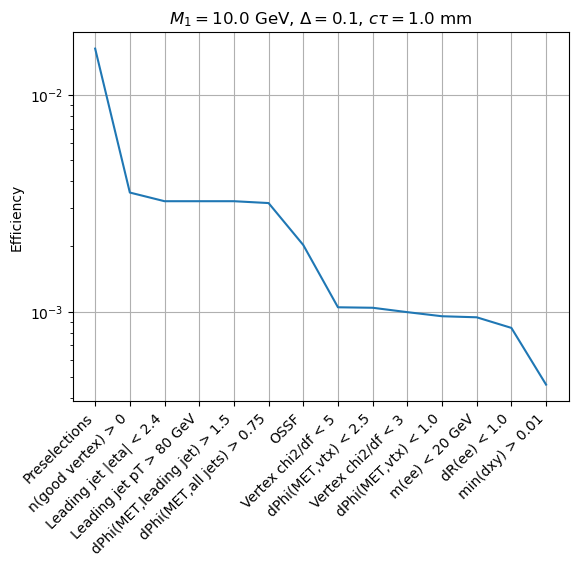

In [49]:
delta = deltas[0]
m1 = m1s[0]
ct = ctaus[0]

plot_efficiency_signal( df_sig = si, dict_eff = cf_s, cuts = cuts, cutNames = cutNames, 
                        m1 = m1, delta = delta, ct = ct, 
                        doSave = True, outDir = 'plots/cutflow/', outName = f'efficiency_m1_{m1}_delta_{delta}_ct_{ct}.png')

### Plot the efficiency with varying m1's overlaid

In [50]:
def plot_efficiency_signal_varying_M1(df_sig, dict_eff, cuts, cutNames, delta, ct, doLog=True, doSave=False, outDir = 'plots/cutflow/', outName='efficiency.png'):
    m1s = sorted(list(set(df_sig[(df_sig.delta==delta)&(df_sig.ctau==ct)].m1)))
        
    for m1 in m1s:
        pt = df_sig[(df_sig.delta==delta) & (df_sig.m1==m1) & (df_sig.ctau==ct)].name[0]
        effs = [dict_eff[pt][cut] for cut in cuts]
        plt.plot(np.arange(len(cuts)), effs, label=r"$M_1 = {0}$ GeV".format(m1), color=f"C{m1s.index(m1)}")

    if doLog:
        plt.yscale('log')

    plt.ylabel('Efficiency')
    
    labels = [cutNames[c] for c in cuts]
    # Replace "No Cuts" with "Preselections" and "Preselection" with "n(good vertex) > 0"
    cut = list(map(lambda x: x.replace('Preselection', 'n(good vertex) > 0'), labels))
    cut = list(map(lambda x: x.replace('No Cuts', 'Preselections'), cut))
    
    plt.xticks(ticks = np.arange(len(cuts)), labels = cut, rotation = 45, ha = 'right')

    plt.grid()

    plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))

    plt.legend()
    
    if doSave:
        if not os.path.isdir(outDir):
            os.makedirs(outDir)
        plt.savefig(f'{outDir}/{outName}')
        print(f'Saved: {outDir}/{outName}')

In [51]:
def plot_counts_signal_varying_M1(df_sig, dict_eff, cuts, cutNames, delta, ct, doLog=True, doSave=False, outDir = 'plots/cutflow/', outName='efficiency.png'):
    m1s = sorted(list(set(df_sig[(df_sig.delta==delta)&(df_sig.ctau==ct)].m1)))
        
    for m1 in m1s:
        pt = df_sig[(df_sig.delta==delta) & (df_sig.m1==m1) & (df_sig.ctau==ct)].name[0]
        effs = [dict_eff[pt][cut] for cut in cuts]
        plt.plot(np.arange(len(cuts)), effs, label=r"$M_1 = {0}$ GeV".format(m1), color=f"C{m1s.index(m1)}")

    if doLog:
        plt.yscale('log')

    plt.ylabel('Events')
    
    labels = [cutNames[c] for c in cuts]
    # Replace "No Cuts" with "Preselections" and "Preselection" with "n(good vertex) > 0"
    cut = list(map(lambda x: x.replace('Preselection', 'n(good vertex) > 0'), labels))
    cut = list(map(lambda x: x.replace('No Cuts', 'Preselections'), cut))
    
    plt.xticks(ticks = np.arange(len(cuts)), labels = cut, rotation = 45, ha = 'right')

    plt.grid()

    plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))

    plt.legend()
    
    if doSave:
        if not os.path.isdir(outDir):
            os.makedirs(outDir)
        plt.savefig(f'{outDir}/{outName}')
        print(f'Saved: {outDir}/{outName}')

Saved: plots/cutflow//efficiency_delta_0.1_ct_1.0.png


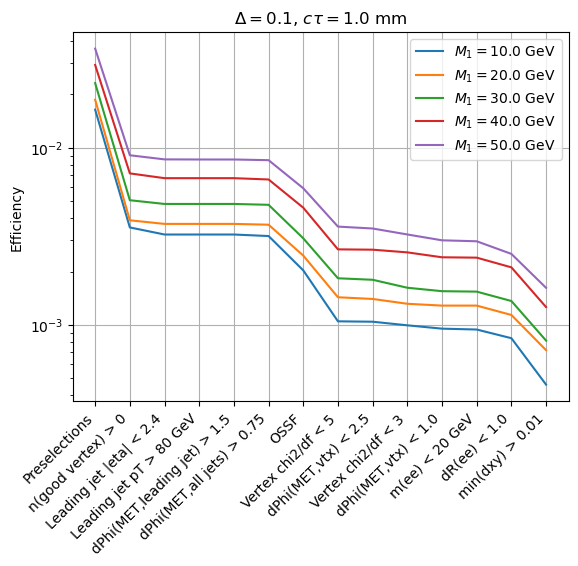

In [52]:
delta = deltas[0]
ct = ctaus[0]

plot_efficiency_signal_varying_M1( df_sig = si, dict_eff = cf_s, cuts = cuts, cutNames = cutNames, 
                                   delta = delta, ct = ct,
                                   doSave = True, outDir = 'plots/cutflow/', outName = f'efficiency_delta_{delta}_ct_{ct}.png')

### Plot with various ctaus on one axis

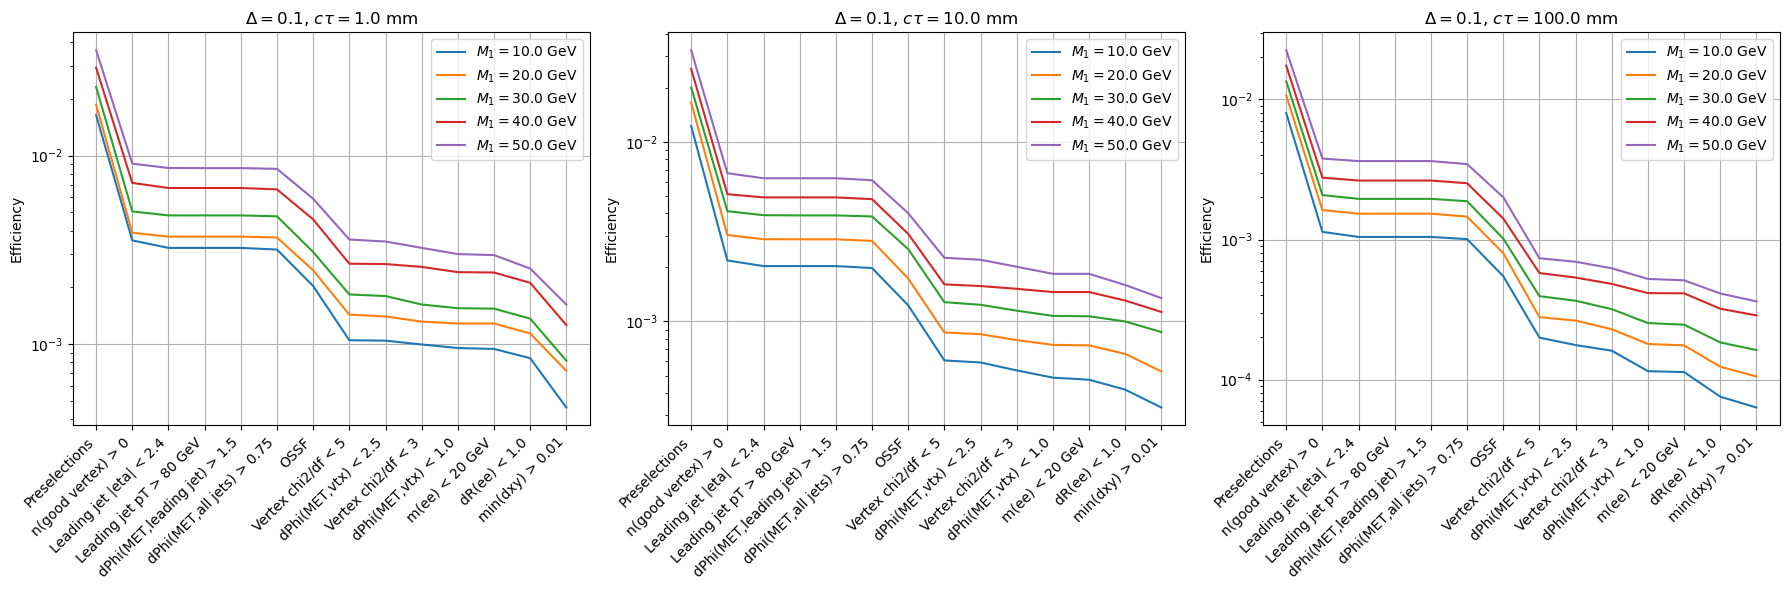

In [53]:
delta = deltas[0]
ctaus = sorted(list(set(si[si.delta==delta].ctau)))

fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))

for i, ct in enumerate(ctaus):
    plt.sca(axes[i])
    plot_efficiency_signal_varying_M1( df_sig = si, dict_eff = cf_s, cuts = cuts, cutNames = cutNames, 
                                       delta = delta, ct = ct )
    #plt.savefig(f'plots/cutflow/efficiency_delta_{delta}.png')
plt.tight_layout()
plt.show()

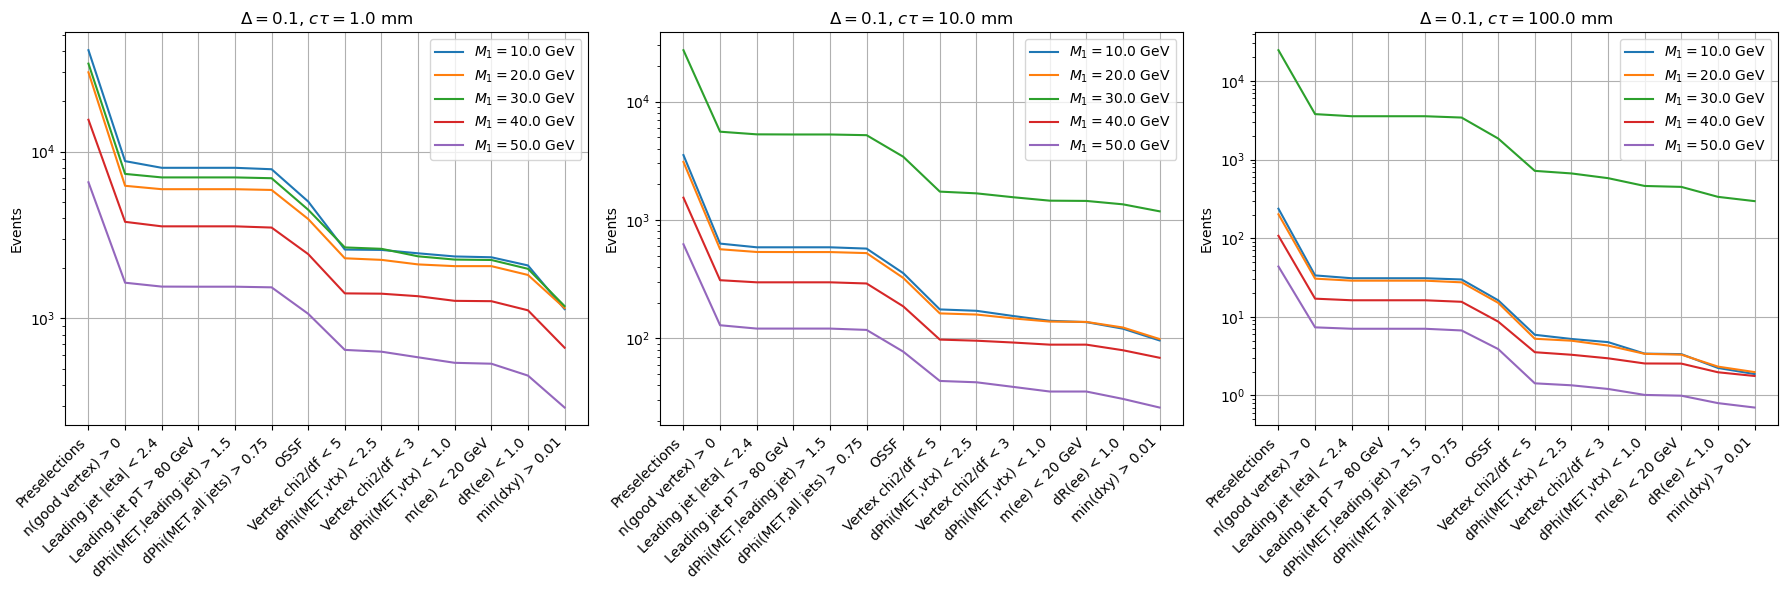

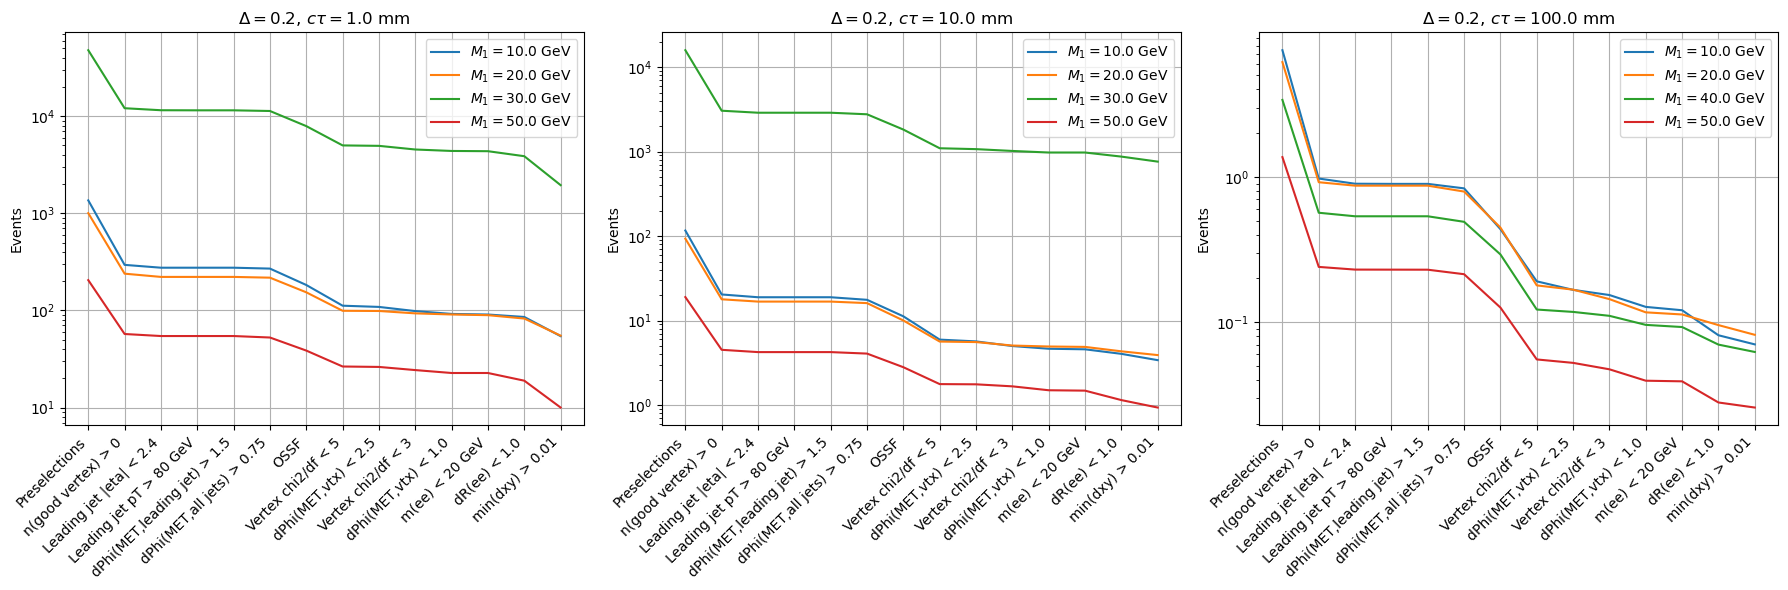

In [54]:
for delta in deltas:
    ctaus = sorted(list(set(si[si.delta==delta].ctau)))
    
    fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
    
    for i, ct in enumerate(ctaus):
        plt.sca(axes[i])
        plot_counts_signal_varying_M1( df_sig = si, dict_eff = ct_s, cuts = cuts, cutNames = cutNames, 
                                           delta = delta, ct = ct )
        #plt.savefig(f'plots/cutflow/efficiency_delta_{delta}.png')
    plt.tight_layout()
    plt.show()

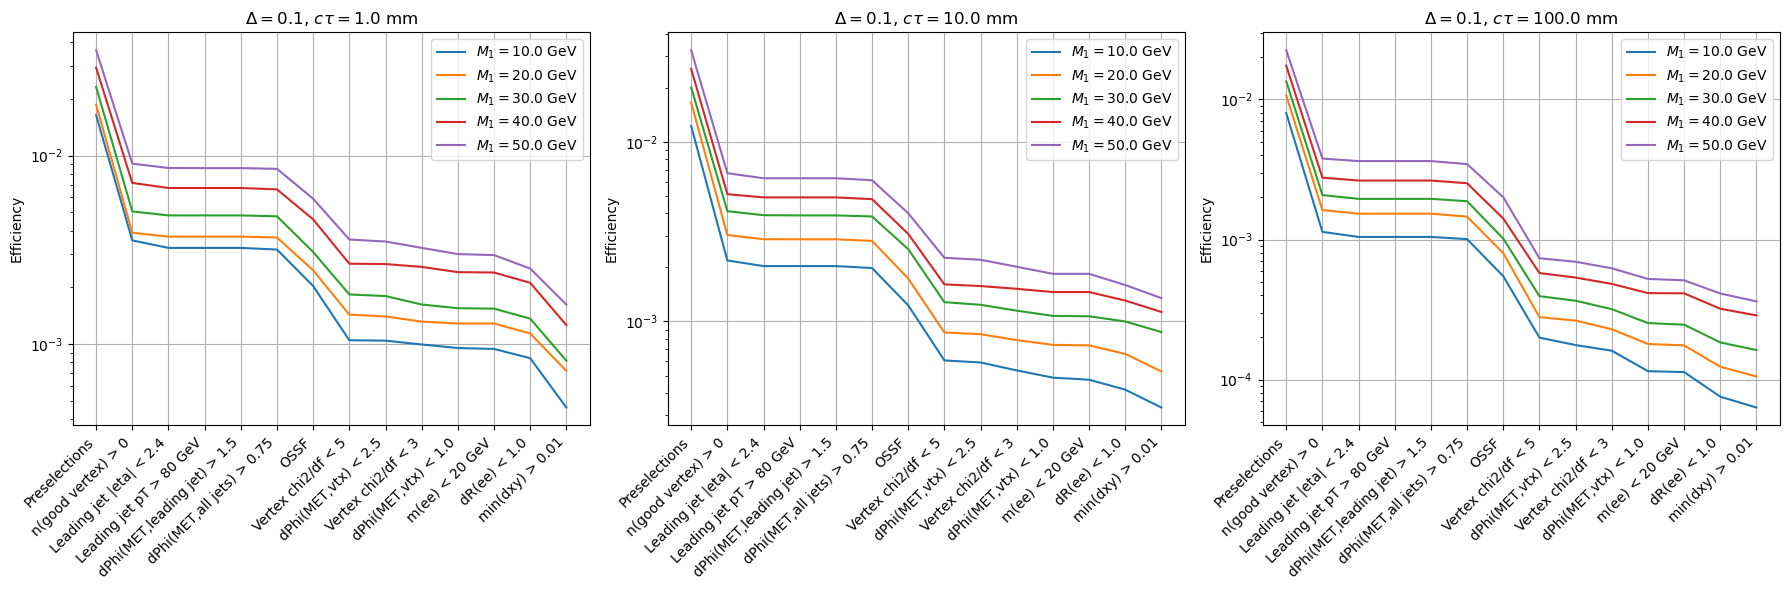

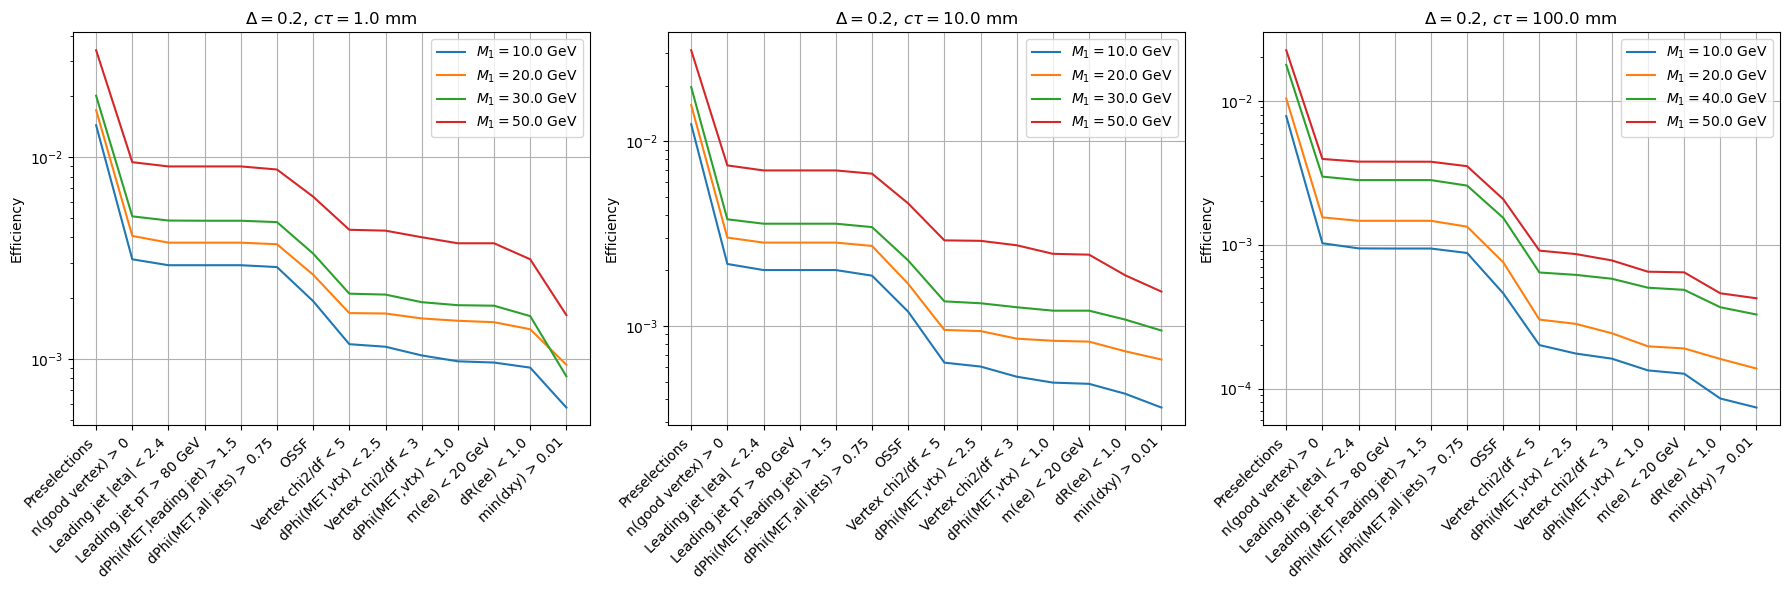

In [55]:
for delta in deltas:
    ctaus = sorted(list(set(si[si.delta==delta].ctau)))
    
    fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
    
    for i, ct in enumerate(ctaus):
        plt.sca(axes[i])
        plot_efficiency_signal_varying_M1( df_sig = si, dict_eff = cf_s, cuts = cuts, cutNames = cutNames, 
                                           delta = delta, ct = ct )
        #plt.savefig(f'plots/cutflow/efficiency_delta_{delta}.png')
    plt.tight_layout()
    plt.show()

## Access the cutflow information -- Background

For background processes, each process (i.e. Top) will have several sub-processes. In the coffea output file, we have efficiencies stored for each sub-processes. In order to get the efficiency of the process, not each sub-process, we have to do some math. In other words, we can't just add up efficiencies.

In [56]:
tot_bkg_cts = {} 
tot_bkg_effs = {} 
total_bkg_counts = {} 

In [58]:
for b in bkg_histos.keys():
    print('\n')
    print(b)
    
    total_bkg_counts[b] = 0
    for k in bkg_histos[b]['cutflow'].keys():
        #print(bkg_histos[b]['cutflow_cts'][k]['all']) # xsec * lumi * (np.sum(events.genWgt)/sum_wgt)
        #print(bkg_histos[b]['cutflow'][k]['all'])     # (np.sum(events.genWgt)/sum_wgt)

        print(f"{k}: xsec * lumi = {bkg_histos[b]['cutflow_cts'][k]['all'] / bkg_histos[b]['cutflow'][k]['all']}")
        
        total_bkg_counts[b] += bkg_histos[b]['cutflow_cts'][k]['all'] / bkg_histos[b]['cutflow'][k]['all']

    print(f'\nxsec * lumi = {total_bkg_counts[b]} for all the sub-processes for {b}')



QCD
bkg_2018_QCD_HT700to1000: xsec * lumi = 380758120.0
bkg_2018_QCD_HT500to700: xsec * lumi = 1853533400.0
bkg_2018_QCD_HT1500to2000: xsec * lumi = 6485572.0
bkg_2018_QCD_HT1000to1500: xsec * lumi = 66830110.0
bkg_2018_QCD_HT300to500: xsec * lumi = 19241327999.999996
bkg_2018_QCD_HT2000toInf: xsec * lumi = 1337798.7999999998

xsec * lumi = 21550273000.799995 for all the sub-processes for QCD


Top
bkg_2018_ST_s-channel: xsec * lumi = 212336.66999999998
bkg_2018_ST_t-channel_antitop: xsec * lumi = 4292802.499999999
bkg_2018_ST_t-channel_top: xsec * lumi = 7161650.999999999
bkg_2018_ST_tW_top: xsec * lumi = 1941483.5
bkg_2018_ST_tw_antitop: xsec * lumi = 1945073.3
bkg_2018_TTJets: xsec * lumi = 28221811.000000004

xsec * lumi = 43775157.97 for all the sub-processes for Top


DY
bkg_2018_0001: xsec * lumi = 321825569.99999994
bkg_2018_0000: xsec * lumi = 321825570.0
bkg_2018_0004: xsec * lumi = 321825570.0
bkg_2018_0002: xsec * lumi = 321825569.99999994

xsec * lumi = 1287302280.0 for 

In [59]:
for b in bkg_histos.keys():
    cfd = bkg_histos[b]['cutflow_cts']
    effd = bkg_histos[b]['cutflow']

    cts_dict = {k:0 for k in cuts}
    
    for k in cfd.keys():
        for c in cuts:
            #print(f'{k} at {c}: xsec * lumi * (np.sum(events.genWgt)/sum_wgt) = {cfd[k][c]}')
            
            cts_dict[c] += cfd[k][c]

    c = 'all'
    print(f'\n{b}:  xsec * lumi * eff at {cutNames[c]} = {cts_dict[c]}')
    
    tot_bkg_cts[b] = cts_dict # subprocess summed
    tot_bkg_effs[b] = {c:cts_dict[c]/total_bkg_counts[b] for c in cuts}

    #print(tot_bkg_cts[b][c])
    #print(total_bkg_counts[b]) # subprocess summed from previous cell


QCD:  xsec * lumi * eff at No Cuts = 38039.826987393106

Top:  xsec * lumi * eff at No Cuts = 5667.491110516481

DY:  xsec * lumi * eff at No Cuts = 14495.724273410278

Diboson:  xsec * lumi * eff at No Cuts = 4424.202427727811

Triboson:  xsec * lumi * eff at No Cuts = 52.99692176633839

W+jets:  xsec * lumi * eff at No Cuts = 227212.60103568572

Z+jets:  xsec * lumi * eff at No Cuts = 142220.15349869026


In [62]:
b = 'Triboson'
c = 'all'

print('Efficiency (all sub-processes considered) = ( xsec * lumi * sum( eff of each sub-process ) ) / ( xsec * lumi )')
print(f'{b} at cut {cutNames[c]}: {tot_bkg_effs[b][c]}')

Efficiency (all sub-processes considered) = ( xsec * lumi * sum( eff of each sub-process ) ) / ( xsec * lumi )
Triboson at cut No Cuts: 0.001932566320050674


In [63]:
bkg_summed_cts = {c:sum([tot_bkg_cts[b][c] for b in tot_bkg_cts.keys()]) for c in cuts}

c = 'cut10'
print(f'Total backgrounds (xsec * lumi * eff) at cut {cutNames[c]}: {bkg_summed_cts[c]}')

Total backgrounds (xsec * lumi * eff) at cut dR(ee) < 1.0: 583.8969950635832


In [64]:
bkg_summed_eff = {c: bkg_summed_cts[c] / sum(total_bkg_counts.values()) for c in cuts}

print(bkg_summed_eff)

{'all': 1.8780920971924116e-05, 'initial': 2.380365129438306e-06, 'cut0': 2.2420855944129067e-06, 'cut1': 2.2379890345887957e-06, 'cut2': 2.2355373649490234e-06, 'cut3': 1.8772649327869606e-06, 'cut4': 1.0052945793048826e-06, 'cut5': 3.1944196687041454e-07, 'cut6': 2.8074374307043474e-07, 'cut7': 1.827671690390647e-07, 'cut8': 8.445376378041415e-08, 'cut9': 7.352357792940875e-08, 'cut10': 2.5377906739830926e-08, 'cut11': 7.0486245735642624e-09}


### Dataframe

In [65]:
columns = list(bkg_histos.keys())
columns

['QCD', 'Top', 'DY', 'Diboson', 'Triboson', 'W+jets', 'Z+jets']

In [66]:
tot_bkg_effs['Triboson']

{'all': 0.001932566320050674,
 'initial': 0.00026779659468989693,
 'cut0': 0.00024875117271042036,
 'cut1': 0.0002481384601478666,
 'cut2': 0.00024798389663936894,
 'cut3': 0.00020391457840447918,
 'cut4': 0.0001086382516718127,
 'cut5': 4.84251022600798e-05,
 'cut6': 4.082428041943792e-05,
 'cut7': 3.901254598970066e-05,
 'cut8': 2.0974231788588377e-05,
 'cut9': 1.2859428802977206e-05,
 'cut10': 1.0285956815400259e-05,
 'cut11': 1.6571714389525645e-06}

In [67]:
efficiency = {c: [ tot_bkg_effs[samp][c] for samp in columns ] for c in cuts}

efficiency['all']

[1.765166825774364e-06,
 0.0001294682046470404,
 1.126054423939207e-05,
 0.0006373026064192725,
 0.001932566320050674,
 0.0023099635965568507,
 0.006645338662101281]

In [68]:
eff_df = pd.DataFrame.from_dict(efficiency).transpose()
eff_df.columns = columns

labels = [cutNames[c] for c in cuts]
# Replace "No Cuts" with "Preselections" and "Preselection" with "n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Preselection', 'n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No Cuts', 'Preselections'), cut))

eff_df.index = cut

In [69]:
pd.options.display.float_format = '{:.9f}'.format
eff_df

,QCD,Top,DY,Diboson,Triboson,W+jets,Z+jets
Preselections,0.000001765,0.000129468,0.000011261,0.000637303,0.001932566,0.002309964,0.006645339
n(good vertex) > 0,0.000000137,0.000022551,0.000002143,0.000083145,0.000267797,0.000321131,0.000743060
Leading jet |eta| < 2.4,0.000000133,0.000019860,0.000002143,0.000076653,0.000248751,0.000301204,0.000697658
Leading jet pT > 80 GeV,0.000000133,0.000019751,0.000002143,0.000075857,0.000248138,0.000300646,0.000696300
"dPhi(MET,leading jet) > 1.5",0.000000131,0.000019737,0.000002143,0.000075544,0.000247984,0.000300532,0.000696215
"dPhi(MET,all jets) > 0.75",0.000000030,0.000017035,0.000001956,0.000066365,0.000203915,0.000252673,0.000652644
OSSF,0.000000029,0.000009261,0.000001695,0.000033539,0.000108638,0.000127586,0.000332882
Vertex chi2/df < 5,0.000000000,0.000002993,0.000001434,0.000010271,0.000048425,0.000035163,0.000086049
"dPhi(MET,vtx) < 2.5",0.000000000,0.000002590,0.000001434,0.000008370,0.000040824,0.000030534,0.000067172
Vertex chi2/df < 3,0.000000000,0.000002287,0.000000111,0.000007404,0.000039013,0.000026931,0.000058877


In [70]:
counts = {c: [ tot_bkg_cts[samp][c] for samp in columns ] for c in cuts}

counts['all']

[38039.826987393106,
 5667.491110516481,
 14495.724273410278,
 4424.202427727811,
 52.99692176633839,
 227212.60103568572,
 142220.15349869026]

In [71]:
cts_df = pd.DataFrame.from_dict(counts).transpose()
cts_df.columns = columns

labels = [cutNames[c] for c in cuts]
# Replace "No Cuts" with "Preselections" and "Preselection" with "n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Preselection', 'n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No Cuts', 'Preselections'), cut))

cts_df.index = cut

In [72]:
pd.options.display.float_format = '{:,.2f}'.format
cts_df

,QCD,Top,DY,Diboson,Triboson,W+jets,Z+jets
Preselections,"38,039.83","5,667.49","14,495.72","4,424.20",53.00,"227,212.60","142,220.15"
n(good vertex) > 0,"2,948.06",987.17,"2,758.17",577.20,7.34,"31,587.11","15,902.59"
Leading jet |eta| < 2.4,"2,861.69",869.39,"2,758.17",532.13,6.82,"29,626.97","14,930.92"
Leading jet pT > 80 GeV,"2,861.69",864.60,"2,758.17",526.61,6.80,"29,572.12","14,901.85"
"dPhi(MET,leading jet) > 1.5","2,821.04",863.98,"2,758.17",524.44,6.80,"29,560.96","14,900.04"
"dPhi(MET,all jets) > 0.75",640.95,745.73,"2,518.29",460.71,5.59,"24,853.43","13,967.56"
OSSF,632.85,405.40,"2,182.06",232.83,2.98,"12,549.61","7,124.18"
Vertex chi2/df < 5,0.00,131.02,"1,845.82",71.30,1.33,"3,458.69","1,841.58"
"dPhi(MET,vtx) < 2.5",0.00,113.38,"1,845.82",58.10,1.12,"3,003.38","1,437.57"
Vertex chi2/df < 3,0.00,100.11,143.51,51.40,1.07,"2,648.97","1,260.07"


### Plots

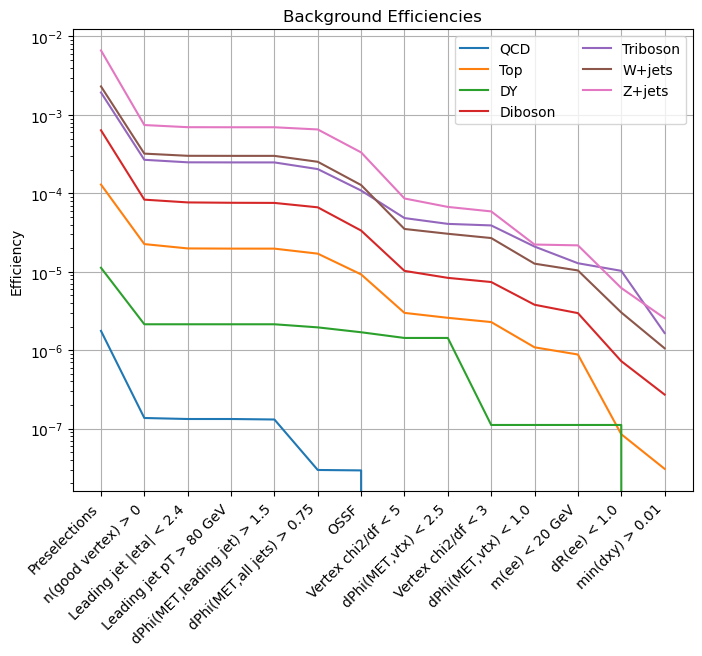

<Figure size 640x480 with 0 Axes>

In [74]:
# bkg efficiencies summed over sub-samples

plt.figure(figsize=(8,6))
plt.title("Background Efficiencies")

for b in bkg_histos.keys():
    cfbs = tot_bkg_effs[b]
    effs = [cfbs[c] for c in cuts]
    plt.plot(np.arange(len(effs)),effs,label=b)
    #plt.ylim([1e-12,1])

plt.yscale('log')
plt.ylabel("Efficiency")
plt.legend(loc='upper right',ncol=2)
plt.grid()

labels = [cutNames[c] for c in cuts]
# Replace "No Cuts" with "Preselections" and "Preselection" with "n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Preselection', 'n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No Cuts', 'Preselections'), cut))
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cut, rotation = 45, ha = 'right')

plt.show()

#os.makedirs("plots/cutflows/")
plt.savefig(f"plots/cutflows/bkg_combined_efficiencies.png")

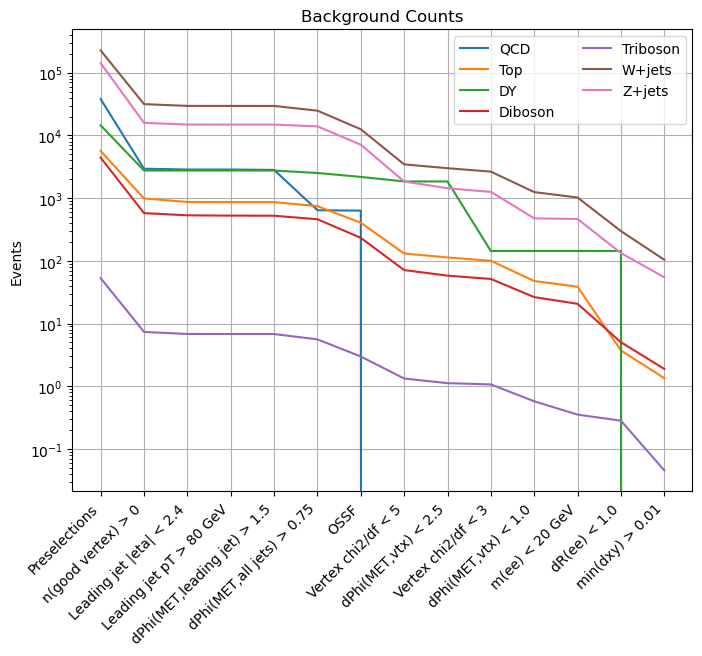

In [75]:
# bkg counts
plt.figure(figsize=(8,6))
plt.title("Background Counts")

for b in bkg_histos.keys():
    cf = tot_bkg_cts[b]
    effs = [cf[c] for c in cuts]
    plt.plot(np.arange(len(effs)), effs, label=b)
    
plt.yscale('log')
plt.ylabel('Events')
plt.legend(loc='upper right',ncol=2)
plt.grid()

labels = [cutNames[c] for c in cuts]
# Replace "No Cuts" with "Preselections" and "Preselection" with "n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Preselection', 'n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No Cuts', 'Preselections'), cut))
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cut, rotation = 45, ha = 'right')

plt.show()

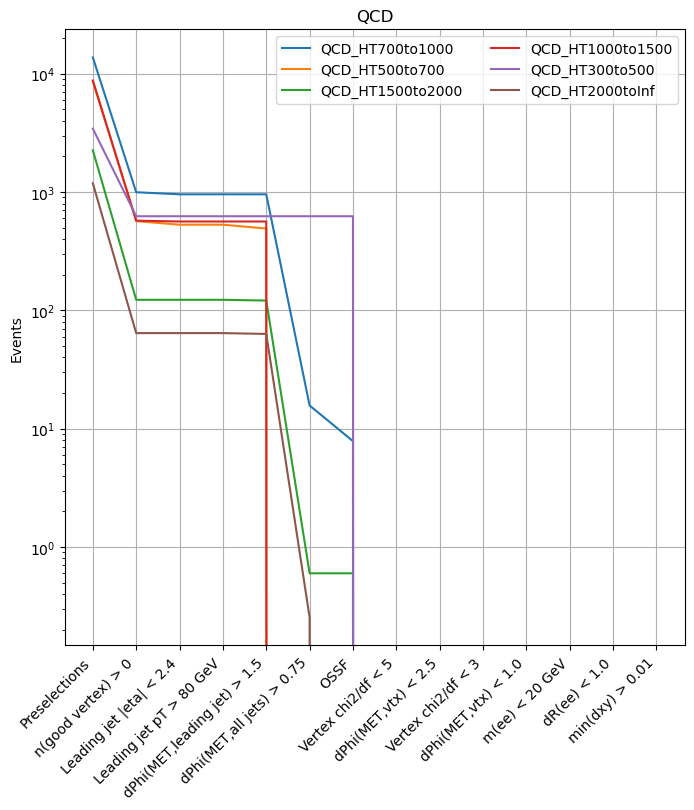

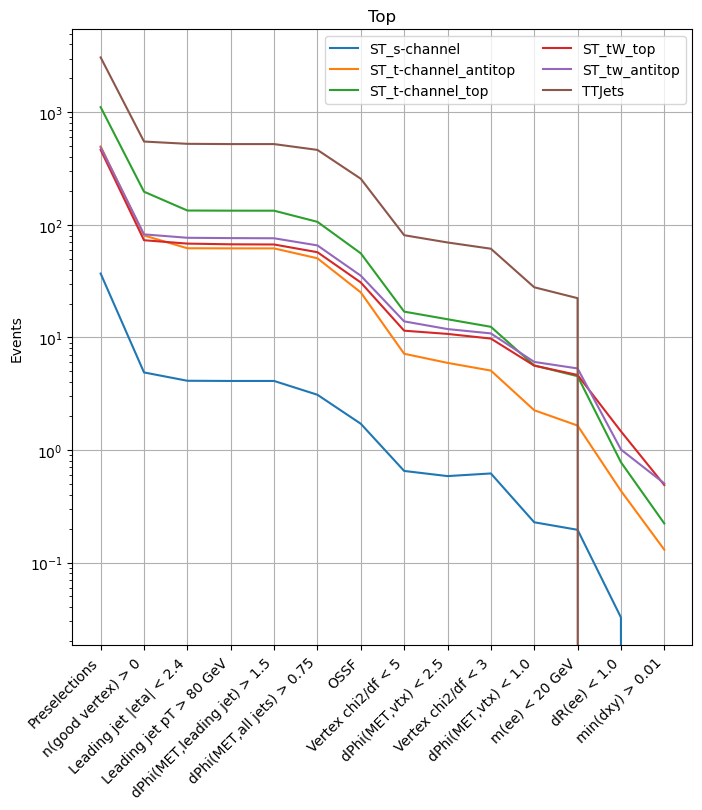

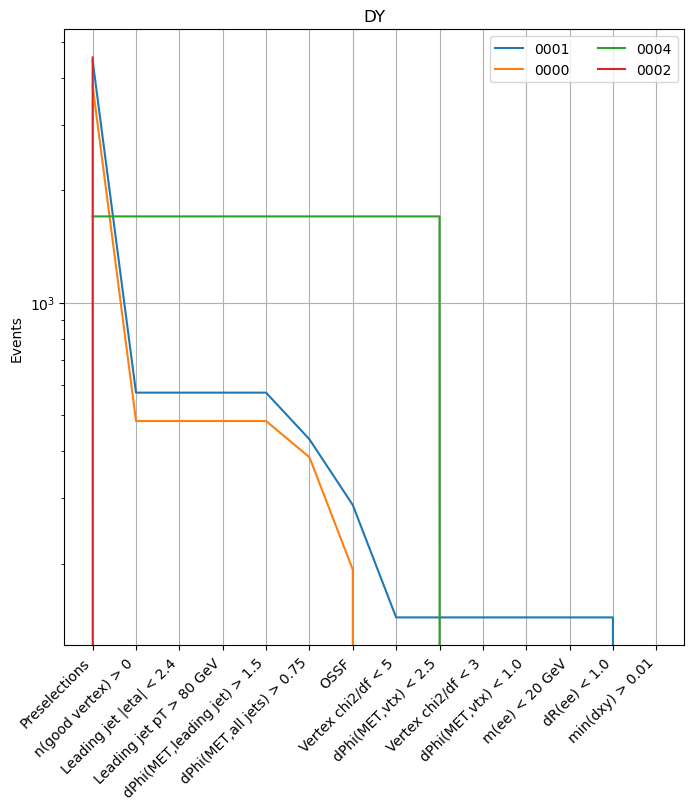

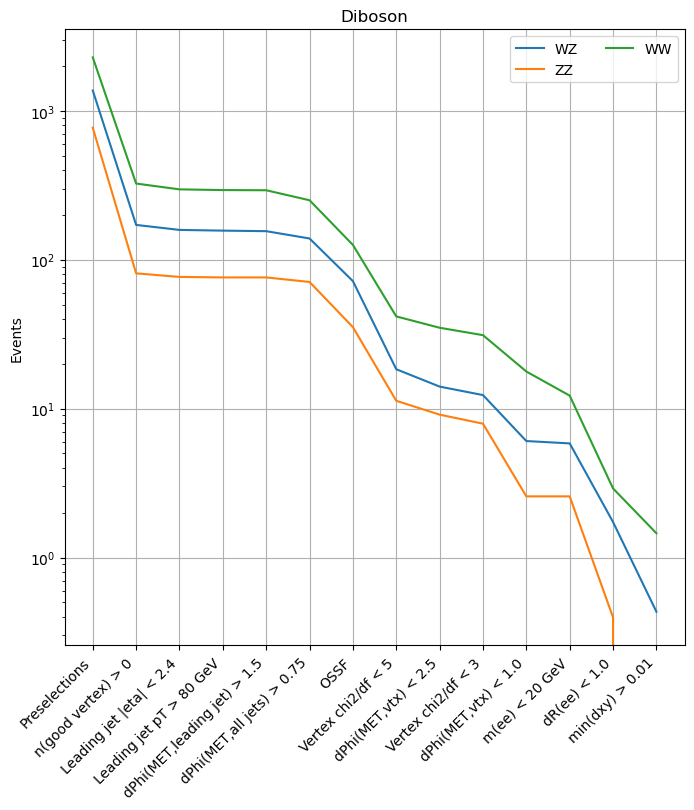

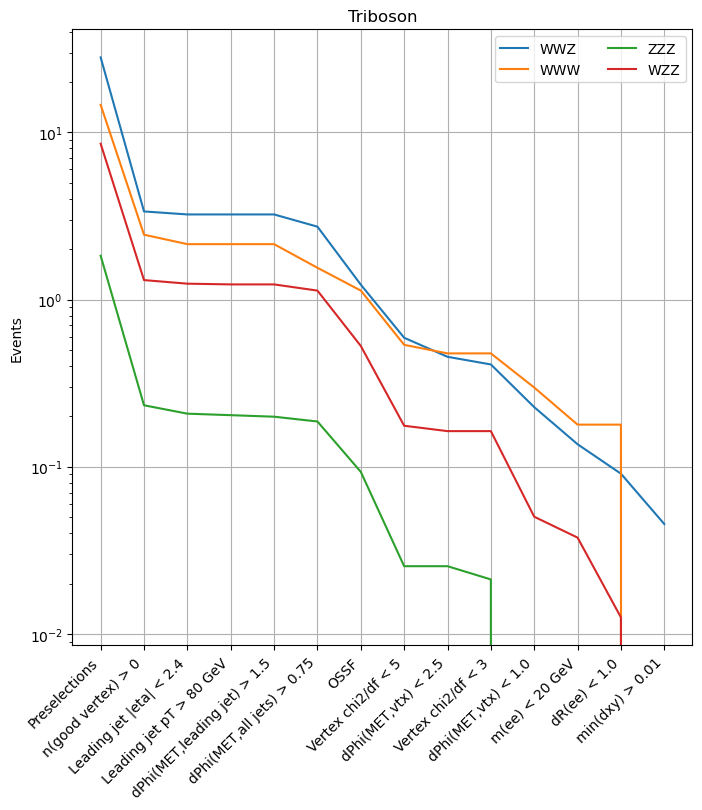

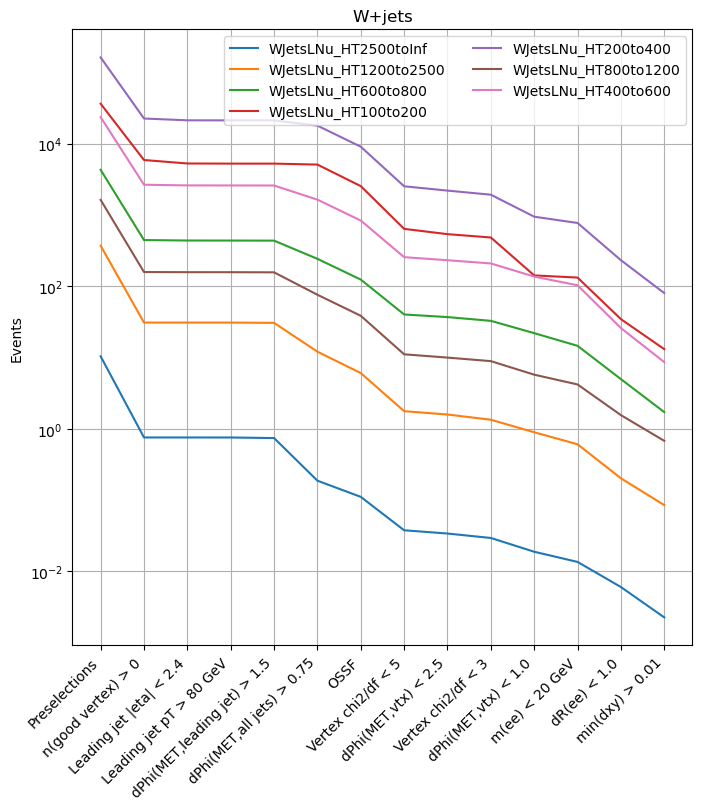

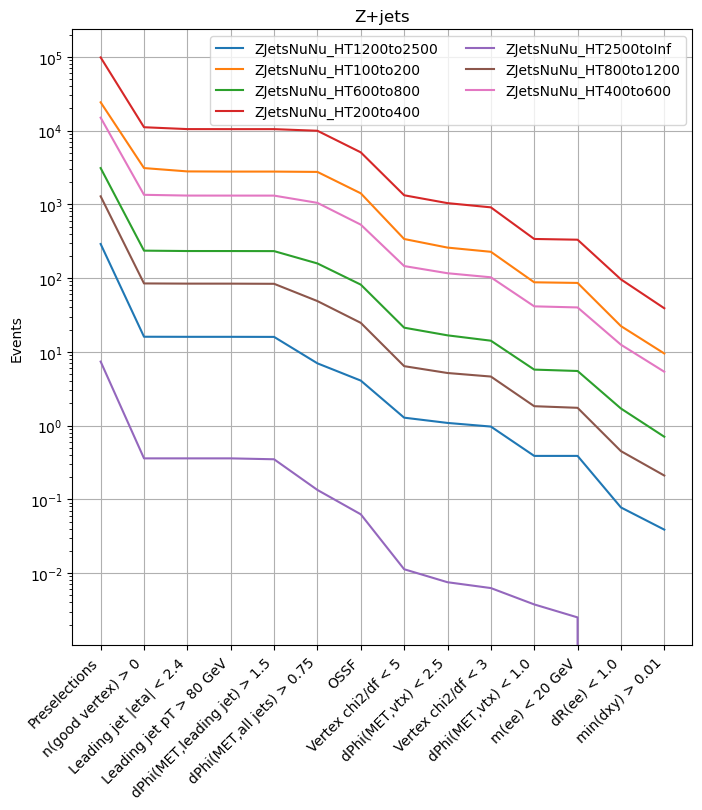

In [76]:
# bkg counts
for b in bkg_histos.keys():
    cfbs = bkg_histos[b]['cutflow_cts']
    #print(cfbs.keys())
    plt.figure(figsize=(8,8))
    plt.title(b)
    subsamples = list(cfbs.keys())
    for bkg_pt in subsamples:
        cf = cfbs[bkg_pt]
        #print(cf)
        effs = [cf[c] for c in cuts]
        plt.plot(np.arange(len(effs)),effs,label=bkg_pt[9:])
    #plt.ylim([1e-12,1])
    plt.yscale('log')
    plt.ylabel('Events')
    plt.legend(loc='upper right',ncol=2)
    plt.grid()
    #plt.xlabel("Cut Number")

    labels = [cutNames[c] for c in cuts]
    # Replace "No Cuts" with "Preselections" and "Preselection" with "n(good vertex) > 0"
    cut = list(map(lambda x: x.replace('Preselection', 'n(good vertex) > 0'), labels))
    cut = list(map(lambda x: x.replace('No Cuts', 'Preselections'), cut))
    
    plt.xticks(ticks = np.arange(len(cuts)), labels = cut, rotation = 45, ha = 'right')
    
    #plt.savefig(f"plots/cutflows/bkg_{b}_counts_pdf")
    #plt.close()